# Klasyfikator klasyczny

In [ ]:
%matplotlib inline
%tensorflow_version 1.x

In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras%
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization import BatchNormalization

from keras import optimizers


from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08, validation_split=0.2)

test_gen = ImageDataGenerator()

train_generator = gen.flow(X_train, Y_train, batch_size=128, subset='training')
valid_generator = gen.flow(X_train, Y_train, batch_size=128, subset='validation')
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [ ]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(16, (5, 5), input_shape=(28,28,1))) # 16 different 5x5 kernels -- so 16 feature maps
model.add(Activation('relu') )                       # activation
model.add(MaxPooling2D(pool_size=(2,2)))             # Pool the max values over a 2x2 kernel

# Convolution Layer 2
model.add(Conv2D(32, (5, 5)))                        # 32 different 5x5 kernels -- so 32 feature maps
model.add(Activation('relu'))                        # activation
model.add(MaxPooling2D(pool_size=(2,2)))             # Pool the max values over a 2x2 kernel

model.add(Flatten())                                 # Flatten final output matrix into a vector

# Fully Connected Layer 
model.add(Dense(128))                                # 128 FC nodes
model.add(Activation('relu'))                        # activation

# Fully Connected Layer                        
model.add(Dense(10))                                 # final 10 FC nodes
model.add(Activation('softmax'))                     # softmax activation

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
activation_6 (Activation)    (None, 8, 8, 32)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [ ]:
# we'll use the same optimizer
adam = optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
model.fit_generator(train_generator, steps_per_epoch=50000//128, epochs=5, verbose=1, validation_data=valid_generator, validation_steps = 10000 // 128)

Epoch 1/5
390/390 [==============================] - 28s 72ms/step - loss: 0.4438 - accuracy: 0.8608 - val_loss: 0.2099 - val_accuracy: 0.9353
Epoch 2/5
390/390 [==============================] - 28s 71ms/step - loss: 0.1427 - accuracy: 0.9575 - val_loss: 0.1024 - val_accuracy: 0.9680
Epoch 3/5
390/390 [==============================] - 28s 72ms/step - loss: 0.1077 - accuracy: 0.9666 - val_loss: 0.1499 - val_accuracy: 0.9703
Epoch 4/5
390/390 [==============================] - 28s 71ms/step - loss: 0.0848 - accuracy: 0.9742 - val_loss: 0.0569 - val_accuracy: 0.9746
Epoch 5/5
390/390 [==============================] - 28s 71ms/step - loss: 0.0701 - accuracy: 0.9784 - val_loss: 0.0715 - val_accuracy: 0.9813


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 107us/step
Test score: 0.028686262824595906
Test accuracy: 0.9908999800682068


# Sieć w pełni splotowa

In [ ]:
!wget https://raw.githubusercontent.com/wut-mpg/ColabNotebooks/main/test.png

(56, 196, 1)
(1, 56, 196, 1)


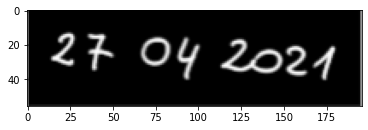

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

img = load_img('test.png', color_mode = "grayscale")
img = img_to_array(img).astype(np.float32) / 255.
print(img.shape)
plt.imshow(img[:,:,0], cmap = 'gray')
img = np.expand_dims(img, 0)
print(img.shape)

In [ ]:
#model.predict(img)

## Struktura sieci

In [ ]:
modelfc = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
modelfc.add(Conv2D(16, (5, 5), input_shape=(None,None,1))) # 16 different 5x5 kernels -- so 16 feature maps
modelfc.add(Activation('relu') )                       # activation
modelfc.add(MaxPooling2D(pool_size=(2,2)))             # Pool the max values over a 2x2 kernel

# Convolution Layer 2
modelfc.add(Conv2D(32, (5, 5)))                        # 32 different 5x5 kernels -- so 32 feature maps
modelfc.add(Activation('relu'))                        # activation
modelfc.add(MaxPooling2D(pool_size=(2,2)))             # Pool the max values over a 2x2 kernel


modelfc.add(Conv2D(128, (4, 4)))                        
modelfc.add(Activation('relu'))                        # activation

modelfc.add(Conv2D(10, (1, 1)))                              
modelfc.add(Activation('softmax'))                     # softmax activation

modelfc.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, None, None, 16)    416       
_________________________________________________________________
activation_9 (Activation)    (None, None, None, 16)    0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, None, None, 16)    0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 32)    12832     
_________________________________________________________________
activation_10 (Activation)   (None, None, None, 32)    0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, None, None, 128)  

In [ ]:
adam = optimizers.Adam(lr=0.001)
modelfc.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

## Trening na obrazach 28x28 px

In [ ]:
Y_train_fc = np.reshape(Y_train, (60000, 1, 1, 10))
Y_test_fc = np.reshape(Y_test, (10000, 1, 1, 10))
print(Y_test_fc.shape)

(10000, 1, 1, 10)


In [ ]:
gen_fc = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08, validation_split=0.2)

test_gen_fc = ImageDataGenerator()

train_generator_fc = gen_fc.flow(X_train, Y_train_fc, batch_size=128, subset='training')
valid_generator_fc = gen_fc.flow(X_train, Y_train_fc, batch_size=128, subset='validation')
test_generator_fc = test_gen_fc.flow(X_test, Y_test_fc, batch_size=128)

In [ ]:
modelfc.fit_generator(train_generator_fc, steps_per_epoch=50000//128, epochs=5, verbose=1, validation_data=valid_generator_fc, validation_steps = 10000 // 128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
390/390 [==============================] - 28s 72ms/step - loss: 0.4163 - accuracy: 0.8737 - val_loss: 0.2627 - val_accuracy: 0.9533
Epoch 2/5
390/390 [==============================] - 27s 70ms/step - loss: 0.1288 - accuracy: 0.9609 - val_loss: 0.2198 - val_accuracy: 0.9653
Epoch 3/5
390/390 [==============================] - 27s 70ms/step - loss: 0.0909 - accuracy: 0.9721 - val_loss: 0.0900 - val_accuracy: 0.9753
Epoch 4/5
390/390 [==============================] - 28s 71ms/step - loss: 0.0766 - accuracy: 0.9755 - val_loss: 0.0836 - val_accuracy: 0.9771
Epoch 5/5
390/390 [==============================] - 28s 72ms/step - loss: 0.0658 - accuracy: 0.9802 - val_loss: 0.0697 - val_accuracy: 0.9816


In [ ]:
score = modelfc.evaluate(X_test, Y_test_fc)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 94us/step
Test score: 0.027255430963542313
Test accuracy: 0.9907000064849854


## Predykcje dla obrazu dowolnej wielkości

In [ ]:
preds = modelfc.predict(img)
print(preds.shape)

(1, 8, 43, 10)


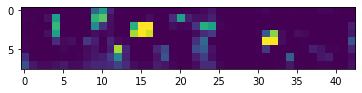

In [ ]:
plt.imshow(preds[0, :, :, 0])

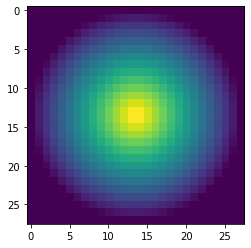

In [ ]:
x_axis = np.linspace(-1, 1, 28)[:, None]
y_axis = np.linspace(-1, 1, 28)[None, :]

arr = 1 - np.sqrt(x_axis ** 2 + y_axis ** 2)
arr[arr<0] = 0
plt.imshow(arr)

In [ ]:
def draw_heatmap(image, preds, kernel, step = 4):
  import cv2

  rows = preds.shape[0]
  cols = preds.shape[1]
  sy = kernel.shape[0]
  sx = kernel.shape[1]

  hmap = np.zeros(image.shape[0:2])

  for r in range(rows):
    for c in range(cols):
      y = r * step
      x = c * step

      hmap[y:y+sy, x:x+sx] = hmap[y:y+sy, x:x+sx] + preds[r, c] * kernel

  if np.amax(hmap) > 1:
    hmap = hmap / np.amax(hmap)
  hmap2 = (hmap * 255).astype(np.uint8)

  cmap = cv2.applyColorMap(hmap2, cv2.COLORMAP_HOT)
  cmap = cmap[:,:,::-1]
  img = (image * 255).astype(np.uint8)
  ret = 0.3 * img + 0.7 * cmap

  return ret.astype(np.uint8)

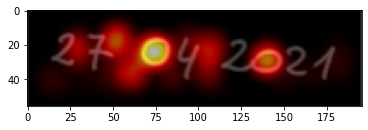

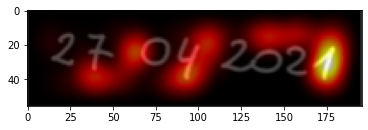

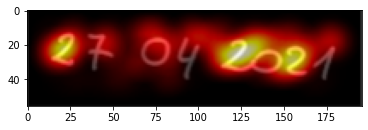

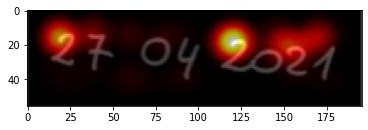

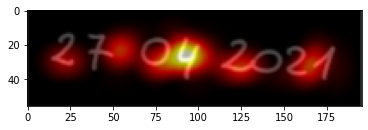

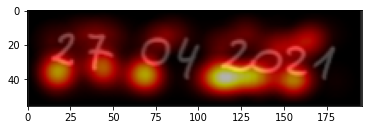

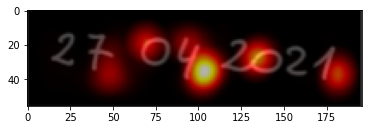

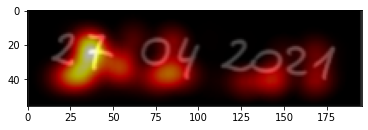

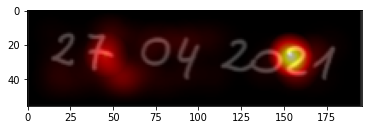

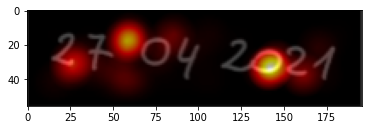

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):
  plt.imshow(draw_heatmap(img[0], preds[0, :, :, i], arr))
  plt.figure()

# Wykorzystanie wag wytrenowanej sieci "klasycznej"

In [ ]:
def to_fully_conv(model):
    from keras.engine import InputLayer

    new_model = Sequential()

    input_layer = InputLayer(input_shape=(None, None, 1), name="input_new")

    new_model.add(input_layer)

    for layer in model.layers:
        
        if "Flatten" in str(layer):

            flattened_ipt = True
            f_dim = layer.input_shape

        elif "Dense" in str(layer):
            input_shape = layer.input_shape
            output_dim =  layer.get_weights()[1].shape[0]
            W,b = layer.get_weights()
            if flattened_ipt:
                shape = (f_dim[1],f_dim[2],f_dim[3],output_dim)
                new_W = W.reshape(shape)
                new_layer = Conv2D(output_dim,
                                          (f_dim[1],f_dim[2]),
                                          strides=(1,1),
                                          activation=layer.activation,
                                          padding='valid',
                                          weights=[new_W,b])
                
                new_model.add(new_layer)
                flattened_ipt = False

            else:
                shape = (1,1,input_shape[1],output_dim)
                new_W = W.reshape(shape)
                new_layer = Conv2D(output_dim,
                                          (1,1),
                                          strides=(1,1),
                                          activation=layer.activation,
                                          padding='valid',
                                          weights=[new_W,b])
                
                new_model.add(new_layer)

        else:
            new_model.add(layer)


    return new_model

In [ ]:
new_model = to_fully_conv(model)
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            multiple                  416       
_________________________________________________________________
activation_5 (Activation)    multiple                  0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_4 (Conv2D)            multiple                  12832     
_________________________________________________________________
activation_6 (Activation)    multiple                  0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, None, None, 128)  

(1, 8, 43, 10)


0.99999607

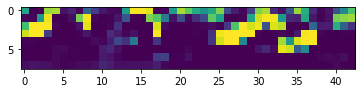

In [ ]:
pred2 = new_model.predict(img)
print(pred2.shape)
plt.imshow(pred2[0,:,:,2])
np.amax(pred2[0,:,:,2])

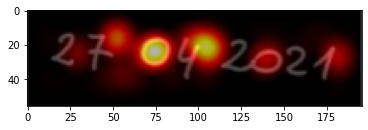

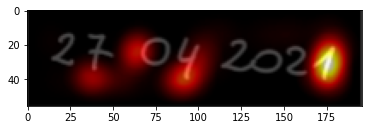

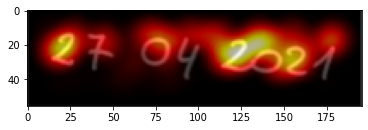

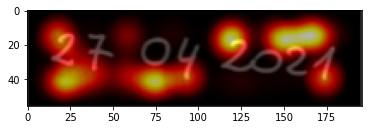

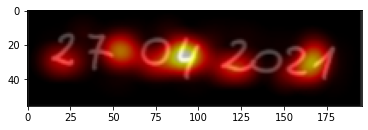

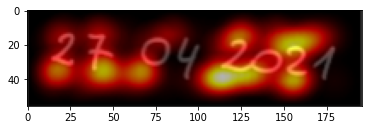

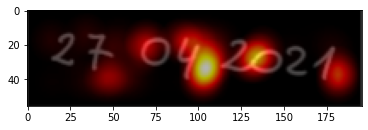

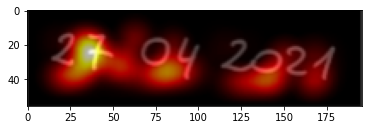

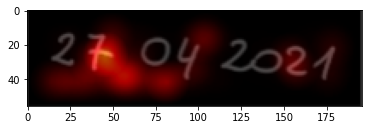

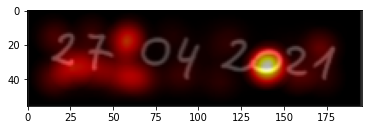

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):
  plt.imshow(draw_heatmap(img[0], pred2[0, :, :, i], arr))
  plt.figure()

# Dodanie klasy negatywnej

In [ ]:
cnt = X_train.shape[0]
neg_cnt = 5000
X_neg = np.zeros((neg_cnt, 28, 28, 1))
y_neg = np.ones((neg_cnt)) * 10
print(X_neg.shape)

theta = np.radians(45)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

for i in range(neg_cnt):
  i1 = X_train[random.randint(0, cnt-1)]
  i2 = X_train[random.randint(0, cnt-1)]
  i3 = X_train[random.randint(0, cnt-1)]
  i4 = X_train[random.randint(0, cnt-1)]
  tmp = np.vstack((np.hstack((i1, i2)), np.hstack((i3, i4))))
  tmp = np.pad(tmp[:,:,0], pad_width=14, mode='constant')

  c = np.random.randint(-14, 14, 2)
  c = (np.matmul(c, R) + 42).astype(np.int32)
  tmp2 = tmp[(c[0]-14):(c[0]+14),(c[1]-14):(c[1]+14)]
  X_neg[i,:,:,0] = tmp2

X_train_bg = np.concatenate((X_train, X_neg))
y_train_bg = np.concatenate((y_train, y_neg))
Y_train_bg = np_utils.to_categorical(y_train_bg, nb_classes + 1)
Y_train_bg = np.reshape(Y_train_bg, (Y_train_bg.shape[0], 1, 1, 11))
print(X_train_bg.shape)
print(Y_train_bg.shape)

(5000, 28, 28, 1)
(65000, 28, 28, 1)
(65000, 1, 1, 11)


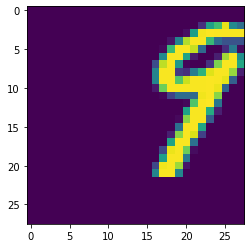

In [ ]:
plt.imshow(X_neg[30,:,:,0])

In [ ]:
gen_bg = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08, validation_split=0.2)

train_generator_bg = gen_bg.flow(X_train_bg, Y_train_bg, batch_size=128, subset='training')
valid_generator_bg = gen_bg.flow(X_train_bg, Y_train_bg, batch_size=128, subset='validation')

In [ ]:
modelbg = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
modelbg.add(Conv2D(16, (5, 5), input_shape=(None,None,1))) # 16 different 5x5 kernels -- so 16 feature maps
modelbg.add(Activation('relu') )                       # activation
modelbg.add(MaxPooling2D(pool_size=(2,2)))             # Pool the max values over a 2x2 kernel

# Convolution Layer 2
modelbg.add(Conv2D(32, (5, 5)))                        # 32 different 5x5 kernels -- so 32 feature maps
modelbg.add(Activation('relu'))                        # activation
modelbg.add(MaxPooling2D(pool_size=(2,2)))             # Pool the max values over a 2x2 kernel


modelbg.add(Conv2D(128, (4, 4)))                        
modelbg.add(Activation('relu'))                        # activation

modelbg.add(Conv2D(10+1, (1, 1)))                              
modelbg.add(Activation('softmax'))                     # softmax activation

modelbg.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, None, None, 16)    416       
_________________________________________________________________
activation_13 (Activation)   (None, None, None, 16)    0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, None, None, 16)    0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, None, None, 32)    12832     
_________________________________________________________________
activation_14 (Activation)   (None, None, None, 32)    0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, None, None, 128)  

In [ ]:
adam = optimizers.Adam(lr=0.001)
modelbg.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
modelbg.fit_generator(train_generator_bg, steps_per_epoch=50000//128, epochs=5, verbose=1, validation_data=valid_generator_bg, validation_steps = 10000 // 128)

Epoch 1/5
390/390 [==============================] - 27s 70ms/step - loss: 0.4497 - accuracy: 0.8641 - val_loss: 0.1270 - val_accuracy: 0.9444
Epoch 2/5
390/390 [==============================] - 27s 69ms/step - loss: 0.1356 - accuracy: 0.9596 - val_loss: 0.0994 - val_accuracy: 0.9671
Epoch 3/5
390/390 [==============================] - 27s 70ms/step - loss: 0.1006 - accuracy: 0.9693 - val_loss: 0.0680 - val_accuracy: 0.9646
Epoch 4/5
390/390 [==============================] - 27s 69ms/step - loss: 0.0763 - accuracy: 0.9764 - val_loss: 0.0690 - val_accuracy: 0.9794
Epoch 5/5
390/390 [==============================] - 27s 68ms/step - loss: 0.0671 - accuracy: 0.9788 - val_loss: 0.0619 - val_accuracy: 0.9803


(1, 8, 43, 11)


0.9998716

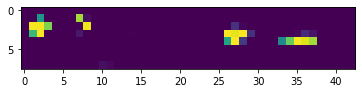

In [ ]:
pred3 = modelbg.predict(img)
print(pred3.shape)
plt.imshow(pred3[0,:,:,2])
np.amax(pred3[0,:,:,2])

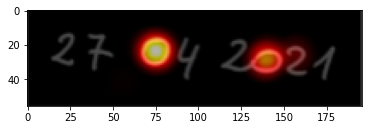

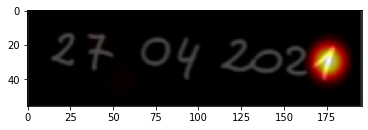

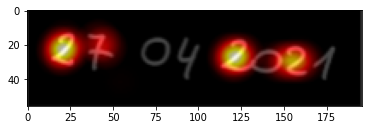

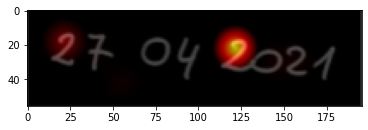

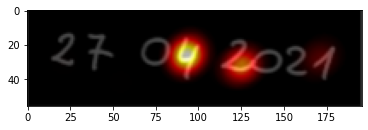

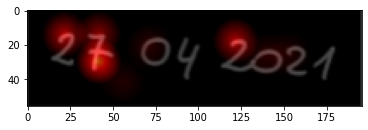

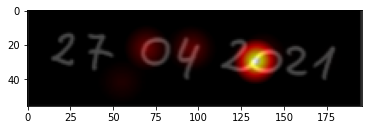

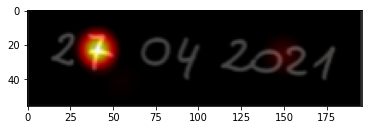

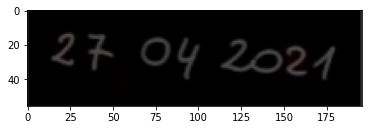

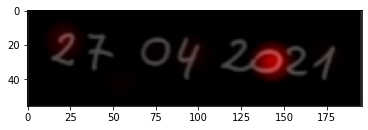

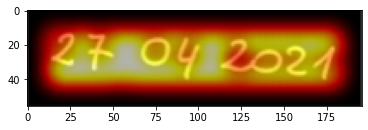

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(11):
  plt.imshow(draw_heatmap(img[0], pred3[0, :, :, i], arr))
  plt.figure()

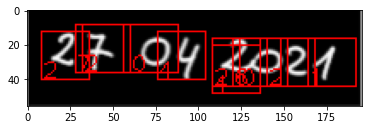

In [ ]:
import scipy.ndimage.filters as filters
import cv2

outimg = cv2.cvtColor(img[0], cv2.COLOR_GRAY2BGR)
for digit in range(10):
  p0 = pred3[0, :, :, digit].copy()
  p0[p0 < 0.9] = 0
  preds_max = filters.maximum_filter(p0, 5)
  preds_max = np.bitwise_and((p0 == preds_max), (p0 > 0))
  plt.imshow(preds_max)

  ids = np.nonzero(preds_max)
  step = 4
  sz = 28
  for (y,x) in zip(*ids):
    cv2.rectangle(outimg, (x*step,y*step), (x*step+sz, y*step+sz), (1, 0, 0))
    cv2.putText(outimg, str(digit), (x*step, y*step+sz), cv2.FONT_HERSHEY_PLAIN, 1, (1, 0, 0))

plt.imshow(outimg)